<a href="https://colab.research.google.com/github/arikinhafln/data-analytics-activities/blob/main/Desafio_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do arquivo JSON
df = pd.read_json('/content/enem_2023.json')

In [ ]:
# 1. Qual das disciplinas tem a maior amplitude de nota?
df.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [ ]:
# Calculando a amplitude de cada disciplina
amplitude_por_disciplina = df.iloc[:, :5].max() - df.iloc[:, :5].min()
amplitude_por_disciplina
print(f"A disciplina com a maior amplitude é {amplitude_por_disciplina.idxmax()}.")

A disciplina com a maior amplitude é Redação.


In [ ]:
# 2. Qual é a média e a mediana para cada uma das disciplinas?
df.columns
df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática',
       'Redação']].mean()

,0
Linguagens,514.524809
Ciências humanas,527.042281
Ciências da natureza,499.315583
Matemática,535.965660
Redação,637.783532


In [ ]:
# mediana
df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática',
       'Redação']].median()

,0
Linguagens,515.045250
Ciências humanas,524.519920
Ciências da natureza,500.479263
Matemática,533.247767
Redação,635.273973


In [ ]:
# 3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:

# Copiando o DataFrame
df_UFPE = df.copy()

# Tratando nulos antes de calcular a média ponderada
df_UFPE.dropna(inplace = True)

# Definindo os pesos de cada disciplina
pesos = {'Redação': 2, 'Matemática': 4, 'Linguagens': 2, 'Ciências humanas': 1, 'Ciências da natureza': 1}

# Calculando a média ponderada das disciplinas
df_UFPE['Média Ponderada'] = (df_UFPE['Redação'] * pesos['Redação'] +
                              df_UFPE['Matemática'] * pesos['Matemática'] +
                              df_UFPE['Linguagens'] * pesos['Linguagens'] +
                              df_UFPE['Ciências humanas'] * pesos['Ciências humanas'] +
                              df_UFPE['Ciências da natureza'] * pesos['Ciências da natureza']) / sum(pesos.values())

# Encontrando os 500 estudantes mais bem colocados
melhores_candidatos = df_UFPE.nlargest(500, 'Média Ponderada')

# Calculando a média das notas dos melhores candidatos
media_melhores_candidatos = melhores_candidatos['Média Ponderada'].mean()

# Calculando o desvio padrão das notas dos melhores candidatos
desvio_padrao_melhores_candidatos = melhores_candidatos['Média Ponderada'].std()

# Resposta
print(f'A média das notas dos 500 melhores candidatos é: {media_melhores_candidatos :.3f}')
print(f'O desvio padrão das notas dos 500 melhores candidatos: {desvio_padrao_melhores_candidatos :.3f}')


A média das notas dos 500 melhores candidatos é: 557.290
O desvio padrão das notas dos 500 melhores candidatos: 40.436


In [ ]:
# 4. Variância e média das notas dos estudantes que entraram no curso de Ciência da Computação
# Selecionando os 40 candidatos que passaram
candidatos_aprovados = melhores_candidatos.head(40)

# Calculando a média das notas desses 40 candidatos
media_candidatos_aprovados = candidatos_aprovados['Média Ponderada'].mean()

# Calculando a variância das notas desses 40 candidatos
variancia_candidatos_aprovados = candidatos_aprovados['Média Ponderada'].var()

# Resposta
print(f'A média das notas dos candidatos aprovados em Ciência da Computação: {media_candidatos_aprovados :.3f}.')
print(f'A variância das notas dos candidatos aprovados em Ciência da Computação: {variancia_candidatos_aprovados :.3f}.')

Média das notas dos candidatos aprovados em Ciência da Computação: 636.683.
Variância das notas dos candidatos aprovados em Ciência da Computação: 295.768.


In [ ]:
# 5.Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?
# Calculando o terceiro quartil para Matemática e Linguagens
terceiro_quartil_matematica = df['Matemática'].quantile(q=0.75)
terceiro_quartil_linguagens = df['Linguagens'].quantile(q=0.75)

# Resposta
print("O teto do terceiro quartil para Matemática é:", np.ceil(terceiro_quartil_matematica))
print("O teto do terceiro quartil para Linguagens é:", np.ceil(terceiro_quartil_linguagens))


Teto do terceiro quartil para Matemática: 593.0
Teto do terceiro quartil para Linguagens: 572.0


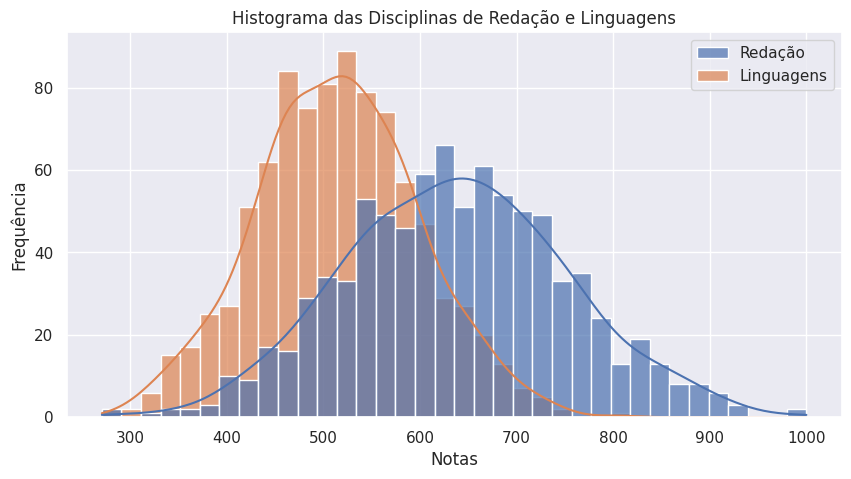

In [ ]:
# 6. . Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifiquese não assimétricas?
# Criando um novo DataFrame com as colunas de Redação e Linguagens
df_redacao_linguagens = df[["Redação", "Linguagens"]]

# Criando o histograma com as duas disciplinas juntas usando Seaborn
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.histplot(data=df_redacao_linguagens, binwidth=20, alpha=0.7, kde=True)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.title('Histograma das Disciplinas de Redação e Linguagens')

# Exibindo o histograma
plt.grid(True)
plt.show()

In [ ]:
# 7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])
# Criando o histograma com as duas disciplinas juntas usando Seaborn
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.histplot(data=df_redacao_linguagens, binwidth=20, binrange=(0, 1000), alpha=0.7, kde=True)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.title('Histograma das Disciplinas de Redação e Linguagens')

# Exibindo o histograma
plt.grid(True)
plt.show()

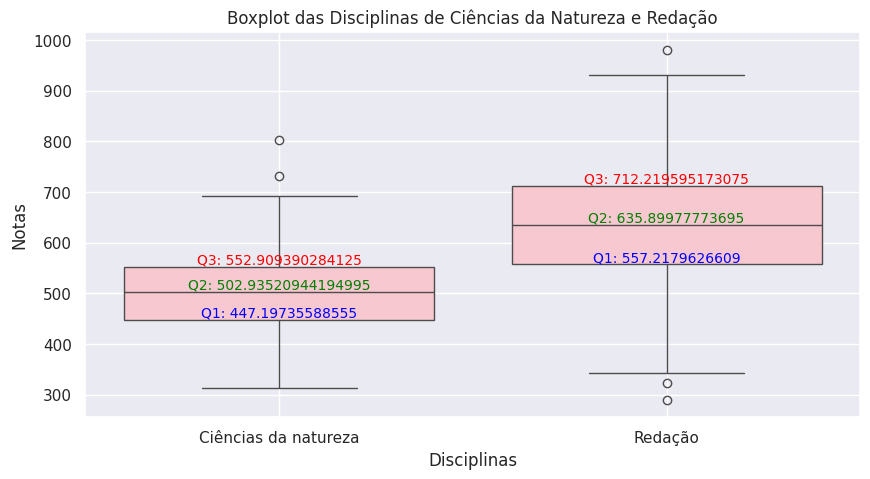

In [ ]:
# 8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.
# Tratamento para valores nulos das colunas Ciências da Natureza e Redação
df_quartil = df[['Ciências da natureza', 'Redação']].dropna()

# Calculando os quartis utilizando o método IQR
quartis = df_quartil.quantile([0.25, 0.5, 0.75])

# Criando o boxplot
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_quartil, color = 'pink', showfliers=True)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Disciplinas')
plt.ylabel('Notas')
plt.title('Boxplot das Disciplinas de Ciências da Natureza e Redação')

# Adicionando valores às linhas dos quartis
for I in range(len(quartis.columns)):
    plt.text(I, quartis.iloc[0, I], f'Q1: {quartis.iloc[0, I]}', ha='center', va='bottom', fontsize=10, color='blue')
    plt.text(I, quartis.iloc[1, I], f'Q2: {quartis.iloc[1, I]}', ha='center', va='bottom', fontsize=10, color='green')
    plt.text(I, quartis.iloc[2, I], f'Q3: {quartis.iloc[2, I]}', ha='center', va='bottom', fontsize=10, color='red')

# Exibindo o boxplot
plt.grid(True)
plt.show()

In [ ]:
# Método IQR
def find_outlier_iqr(dataset, colname):
  q25 = np.quantile(dataset[colname], 0.25)
  q75 = np.quantile(dataset[colname], 0.75)

  # Calcula  IQR
  iqr = q75 - q25

  # Calcula outlier cutoff
  cut_off = iqr * 1.5

  # Calcula margens inferiores (lower) e superiores (upper)
  lower = q25 - cut_off
  upper = q75 + cut_off

  outliers = []

  for I in dataset[colname].values:
    if((I > upper) or (I < lower)):
      outliers.append(I)

  print(f"Disciplina: {colname}.")
  print(f"Número de outliers encontrado: {len(outliers) :.3f}.")
  print(f"IQR: {iqr}. \nValor mínimo: {lower :.3f}. \nValor máximo: {upper :.3f}.\n")

# Resposta
for column in df_quartil:
    find_outlier_iqr(df_quartil, column)

Disciplina: Ciências da natureza.
Número de outliers encontrado: 2.000.
IQR: 105.71203439857504. 
Valor mínimo: 288.629. 
Valor máximo: 711.477.

Disciplina: Redação.
Número de outliers encontrado: 3.000.
IQR: 155.0016325121751. 
Valor mínimo: 324.716. 
Valor máximo: 944.722.



In [ ]:
# 9.
# Essa busca outliers e substitiu seu valor para NaN
def replace_na_outlier_zscore(dataset, threshold, colname):
  df = dataset[colname]
  outliers = []
  zscore = []
  val = []
  threshold = threshold
  mean = np.mean(df)
  std = np.std(df)

  for I in df.values:
    z_score = (I - mean) / std
    zscore.append(z_score)

    if np.abs(z_score) > threshold:
      outliers.append(I)
      val.append(np.nan)
    else:
      val.append(I)

  return val

# Essa função remove os outliers removendo todos os valores nulos
def drop_outliers(dataset, threshold):
  for column in dataset.select_dtypes(include=np.number).columns:
    dataset[column] =  replace_na_outlier_zscore(dataset, 3, column)
  return dataset.dropna()

# Essa função valida se existe alteração significativa
def validar_diferenca(diferenca_percentual):
  if diferenca_percentual < 5:
    return "Não. A remoção dos outliers não resultou em alterações significativas na média nacional"
  else:
    return "Sim. A remoção dos outliers resultou em alterações significativas na média nacional"

# Criando um DataFrame sem outliers
df_original = df.copy()
df_sem_outliers = drop_outliers(df_original, 3)

# Calculando a média nacional
media_nacional_original = df.mean(numeric_only=True).mean()
media_nacional_sem_outliers = df_sem_outliers.mean(numeric_only=True).mean()

# Calculando diferença percentual
diferenca_percentual = ((media_nacional_sem_outliers - media_nacional_original) / media_nacional_original) * 100

# Resposta
print(f'A média nacional antes de remover outliers é: {media_nacional_original :.3f}.')
print(f'A média nacional após remover outliers é: {media_nacional_sem_outliers :.3f}.')
print(f'A diferença percentual entre as médias é: {diferenca_percentual :.3f}.')
print(f'Podemos concluir que: {validar_diferenca(diferenca_percentual)}.')

A média nacional antes de remover outliers é: 542.926.
A média nacional após remover outliers é: 544.660.
A diferença percentual entre as médias é: 0.319.
Podemos concluir que: Não. A remoção dos outliers não resultou em alterações significativas na média nacional.


In [ ]:
# 10 . Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou
# Dataframe original com valores nulos
df_original = df.select_dtypes(include=np.number)

# Substituindo valores nulos de cada coluna pela média
df_media = df_original.copy()
for coluna in colunas_numericas:
    media_coluna = df_original[coluna].mean()
    df_media[coluna].fillna(media_coluna, inplace=True)

# Substituindo valores nulos de cada coluna pela moda
df_moda = df_original.copy()
for coluna in colunas_numericas:
    moda_coluna = df_original[coluna].mode()[0]
    df_moda[coluna].fillna(moda_coluna, inplace=True)

df_mediana = df_original.copy()
for coluna in colunas_numericas:
    mediana_coluna = df_original[coluna].median()
    df_mediana[coluna].fillna(mediana_coluna, inplace=True)



NameError: name 'colunas_numericas' is not defined